In [51]:
import sys
from pathlib import Path


PROJECT_PATH = Path("C:/Users/barto/Desktop/Studia/ASI/Projekt/ASI.Backend/asibackend/")
SRC_PATH = PROJECT_PATH / "src"


sys.path.append(str(SRC_PATH))


from kedro.framework.project import configure_project
from kedro.framework.session import KedroSession

configure_project("asibackend")
session = KedroSession.create(project_path=PROJECT_PATH)
context = session.load_context()


In [52]:
df = context.catalog.load("hr_dataset")

[05/22/25 21:42:47] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=98082;file://c:\Users\barto\AppData\Local\Programs\Python\Python312\Lib\site-packages\kedro_telemetry\plugin.py\plugin.py]8;;\:]8;id=741538;file://c:\Users\barto\AppData\Local\Programs\Python\Python312\Lib\site-packages\kedro_telemetry\plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

                    INFO     Loading data from hr_dataset (CSVDataset)...                       ]8;id=726811;file://c:\Users\barto\AppData\Local\Programs\Python\Python312\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=556898;file://c:\Users\barto\AppData\Local\Programs\Python\Python312\Lib\site-packages\kedro\io\data_catalog.py#403\403]8;;\


Index(['Salary', 'Position', 'DateofHire', 'TermReason', 'EmploymentStatus',
       'Department', 'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'DaysLateLast30', 'Absences'],
      dtype='object')

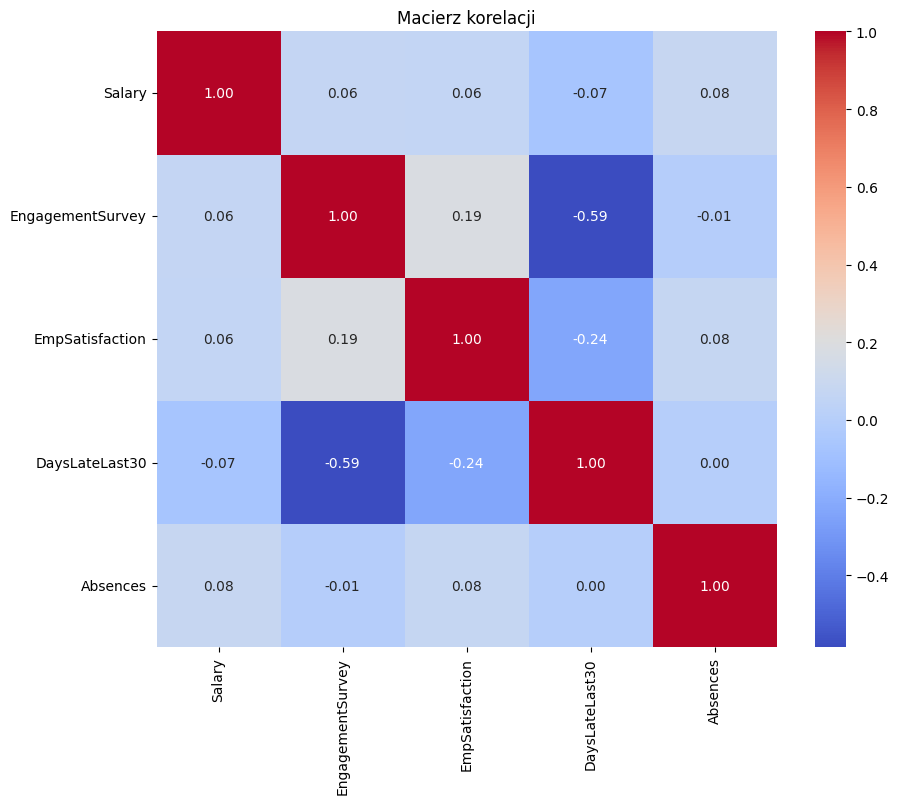

In [58]:
df = df.drop(columns=[
    "Employee_Name",
    "EmpID",
    "MarriedID",
    "PositionID",
    "MaritalStatusID",
    "LastPerformanceReview_Date",
    "RecruitmentSource",
    "ManagerName",
    "DateofTermination",
    "RaceDesc",
    "CitizenDesc",
    "MaritalDesc",
    "HispanicLatino",
    "Sex",
    "DOB",
    "Zip",
    "State",
    "Termd",
    "FromDiversityJobFairID",
    "PerfScoreID",
    "EmpStatusID",
    "GenderID",
    "DeptID",
    "ManagerID",
    "SpecialProjectsCount"
], errors="ignore")


## EmploymentStatus, TermReason - sie zastanaowic 
## DateofHire - zmienic na staz pracy

correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Macierz korelacji")
# plt.show()

df.columns